## ASTR 507A : Assignment 6
### Francis Rossmann : 40065154

___
In April 2013 the Herschel spacecraft observed the dwarf planet/comet Ceres to have a 70um flux density of 246.5 Jy, 100um flux density of 162.9 Jy, and a 160 um flux density of 60.0 Jy. At the time of observations, Ceres was 2.8968 au from Earth and 2.5828 au from the Sun. Assume Ceres is spherical with radius 473 km, a Bond albedo of 0.09 and emissivity of 1.

___
___
#### a) Determine T_eq for Ceres assuming this body is a fast rotator.
____
##### Method: 
Assuming Ceres is a fast rotator, we can calculate the equilibrium temperature as: 

$$T_{eq} = \left(\mathcal{F} \cdot \frac{(1-A_B)}{4\epsilon\sigma}\right)$$

where:  
$\mathcal{F} = \frac{\mathcal{L}}{4\pi r^2}$ is the solar constant and,  
$\mathcal{L} = 3.827 \cdot 10^{26} \quad Js^{-1}$ is the solar luminosity.  
$r  = 2.5828 AU $ is Ceres' heliocentric distance  
$\sigma = 5.6704\cdot10^{-8} Wm^{-2}K^{-4}: $ is the Stefan-Boltzmann constant  
$A = 0.09$ is the bond albedo  
$\epsilon$, the emissivity, is set to 1  
and the factor of 4 in the denominator reflects the ratio of surface area receiving incident flux to emitting area for a fast rotator.

___
##### Result: 
Using this procedure, we arrive at an equilibrium temperature of 169.14 K.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants:
sigma = 5.6704e-8  # Stefan-Boltzmann constant [W⋅m−2⋅K−4]
AU2m = 1.496e11  # 1 AU [m]
fancyL = 3.827e26  # Solar luminosity [W]
lightspeed = 2.997925e8  # Speed of light [ms-1]
planck = 6.626069e-34  # Planck constant [Js]
boltzmann = 1.380650e-23  # Boltzmann constant [ Kdeg-1]

# Preliminaries for Ceres: 
radiusCeres = 473000  # [m]
bondAlbedo = 0.09
emissivity = 1
distance = 2.5828 * AU2m  # [m]
solidAngle = np.pi * (radiusCeres ** 2) / (distance ** 2)

# Calculate equilibrium temperature for Ceres: 
solarConstant = fancyL / (4 * np.pi * (distance ** 2))  # [W⋅m-2]
temperature = (((1 - bondAlbedo) * solarConstant) / (4 * sigma * emissivity)) ** (
    1 / 4
)  # fast rotator
print(f'Equilibrium temperature is {np.around(temperature,2)} K')

Equilibrium temperature is 169.14 K


___
___
#### b) Fit a blackbody curve to these values and determine a T_eff for Ceres.

##### Method: 
Using Planck's radiation law, we can find the temperature dependant brightness of Ceres over a set of frequencies. This is given as: 

$$B_v = \frac{2hv^3}{c^2}\cdot \frac{1}{e^{\frac{hv}{kT}} - 1} $$

where:  
$c = 2.997925e8\quad ms^{-1}$: the speed of light  
$h = 6.626069e-34\quad Js$: the Planck constant  
$k = 1.380650e-23\quad JK^{-1}$: the Boltzmann constant 
$T$ is surface temperature  
and $v$ is the radiation frequency  

To convert to a flux density, we can multiply the brightness $B_v$ above by the solid angle, $\Omega$, where:  
$\Omega = \pi \frac{R_{Ceres}^2}{r^2} $, and  
$r = 2.5828 AU$ is the heliocentric distance  
$R_{Ceres}$ as defined above.

In order to fit a blackbody curve to the observations provided, we can calculate brightness over a range of temperatures (over the relevant frequencies). Frequencies are obtained as:  
$ v = \frac{c}{\lambda} $. 
where $\lambda$ is the wavelength.

*Figure 1* below shows dashed lines representing the flux density of Ceres as calculated using a range of temperatures. From this, we can approximate a range of possible temperatures to which the data can be fit. Following, I calculate the RMSE error between observations and flux density, with a temperature range with spacing $\Delta T = 2 K$.

___
##### Result: 
The best fit is determined for a effective temperature of 177.55 Kelvin

Error is minimized at T_eff = 177.55 K


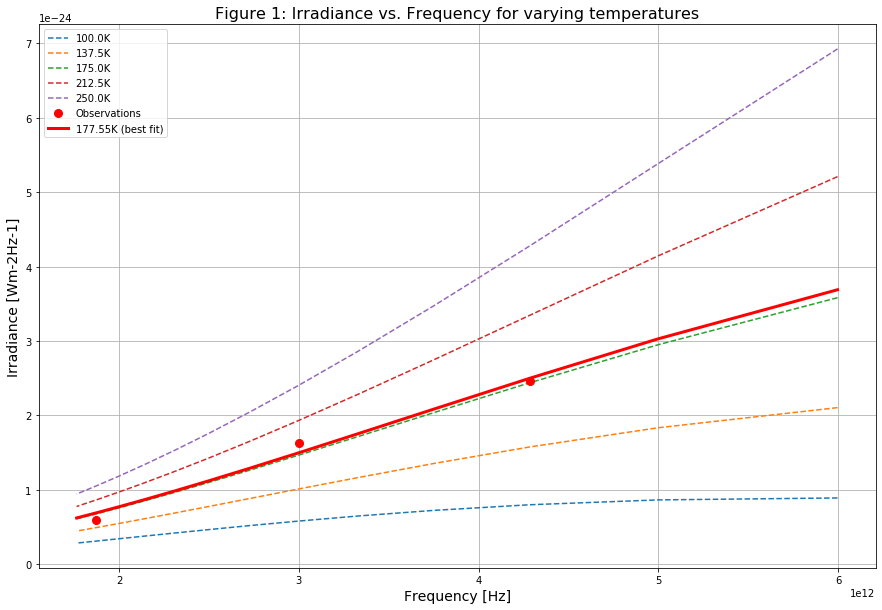

In [12]:
# Define observations for problem: 
wavelengths = np.array([70, 100, 160]) * 1e-6  # [m]
fluxes = np.array([246.5, 162.9, 60.0]) * 1e-26  # [Wm-2Hz-1]


def getFluxDensity(frequency, temperature):
    irradiance = (
        (2 * planck * (frequency ** 3))
        / (
            (lightspeed ** 2)
            * (np.exp((planck * frequency) / (boltzmann * temperature)) - 1)
        )
        * solidAngle
    )
    return irradiance


# Make some test data: 
temperatures = np.linspace(100, 250, 5)  # [K]
frequencies = lightspeed / (np.arange(50, 180, 10) * 1e-6)  # [m]

## Plot some blackbody curves for Ceres to inform a best-guess:
%matplotlib inline
plt.figure(figsize=(15,10))
for temp in temperatures:
    irradiance = getFluxDensity(frequencies, temp)
    plt.plot(frequencies, irradiance,'--', label=(str(temp) + "K"))
plt.xlabel("Frequency [Hz]",FontSize=14)
plt.ylabel("Irradiance [Wm-2Hz-1]",FontSize=14)
plt.title("Figure 1: Irradiance vs. Frequency for varying temperatures",FontSize=16)
plt.grid()
plt.plot(lightspeed / wavelengths, fluxes, "ro",MarkerSize=8,label='Observations')

# Make a vector of temperatures centered about ~175K 
# and find temperature which minimized RMSE error 
# between model and observations:
temperatures = np.linspace(150, 200, 50)  # [K]
targets = lightspeed / wavelengths
error = []
for temp in temperatures:
    irradiance = getFluxDensity(frequencies, temp)
    rmse = np.sqrt(
        (irradiance[frequencies == targets[0]] - fluxes[0]) ** 2
        + (irradiance[frequencies == targets[1]] - fluxes[1]) ** 2
        + (irradiance[frequencies == targets[2]] - fluxes[2]) ** 2
    )
    error.append(rmse)
theTemp = np.around(temperatures[np.argmin(error)],2)    
plt.plot(frequencies, getFluxDensity(frequencies, theTemp),'r', label=(str(theTemp) + 'K (best fit)'),linewidth=3)
plt.legend()

print(f"Error is minimized at T_eff = {theTemp} K")


____
____
#### c) Using the values of T_eq and T_eff determine the value of eta in the NEATM 
#### d) What can we infer when comparing the fit value of eta for Ceres compared with the STM value of eta=0.76?
____
##### Method: 
A beaming factor $\eta$ is used as a fudge-factor to quantify the backscattering due (mainly) to surface roughness.

Using the equation provided in the course notes (note that the distance dependance is captured in our solar constant value)

$$ \eta \epsilon \sigma T^4 = \frac{(1-A_B)S}{4} $$ 


We can plug in the best fit T_eff and solve for $\eta$ as: 
$$ \eta = \frac{(1-A_B)S}{\epsilon \sigma T_{best}^4} $$
____
##### Result: 
The beaming factor is determined to be $\eta = 0.82$. The STM beaming factor is 0.76. From this difference, we can infer that the high beaming factor reflects a preferential backscattering of incident radiation due to a surface roughness which is greter than what the STM model captures.

In [13]:
# Now we can find the fudge factor 'eta': 
eta = (((1 - bondAlbedo) * solarConstant) / (4 * sigma * emissivity * (theTemp**4)))
print(f'Eta has a value of {np.around(eta,2)} compared to an STM beaming factor of 0.76')

Eta has a value of 0.82 compared to an STM beaming factor of 0.76
